# **Exploring Centrality Measures in Graph Teory with Python**
by Daniel Stulberg Huf and Ingrid Valverde Reis Zreik

Centrality measures play an important role in network analysis, helping us identify the most influential nodes within a network or graph. In this Python notebook, we will implement and compare four fundamental centrality metrics: **Degree Centrality, Clustering Coefficient Centrality, Closeness Centrality, and Betweenness Centrality**. Through this exploration, we aim to understand the concepts behind these metrics, implement them on small and medium-sized example graphs, and visualize the results to gain insights into the importance of nodes within these networks.

Firstly, we will import the necessary libraries to run this notebook.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## **Building the Sample Graphs**
In this section, we create four different sample graphs of small to medium size that will be used throughout the notebook for comparing their respective centrality measures. Those graphs are built in a way that we can clearly visualize the difference and relevance between each centrality result.

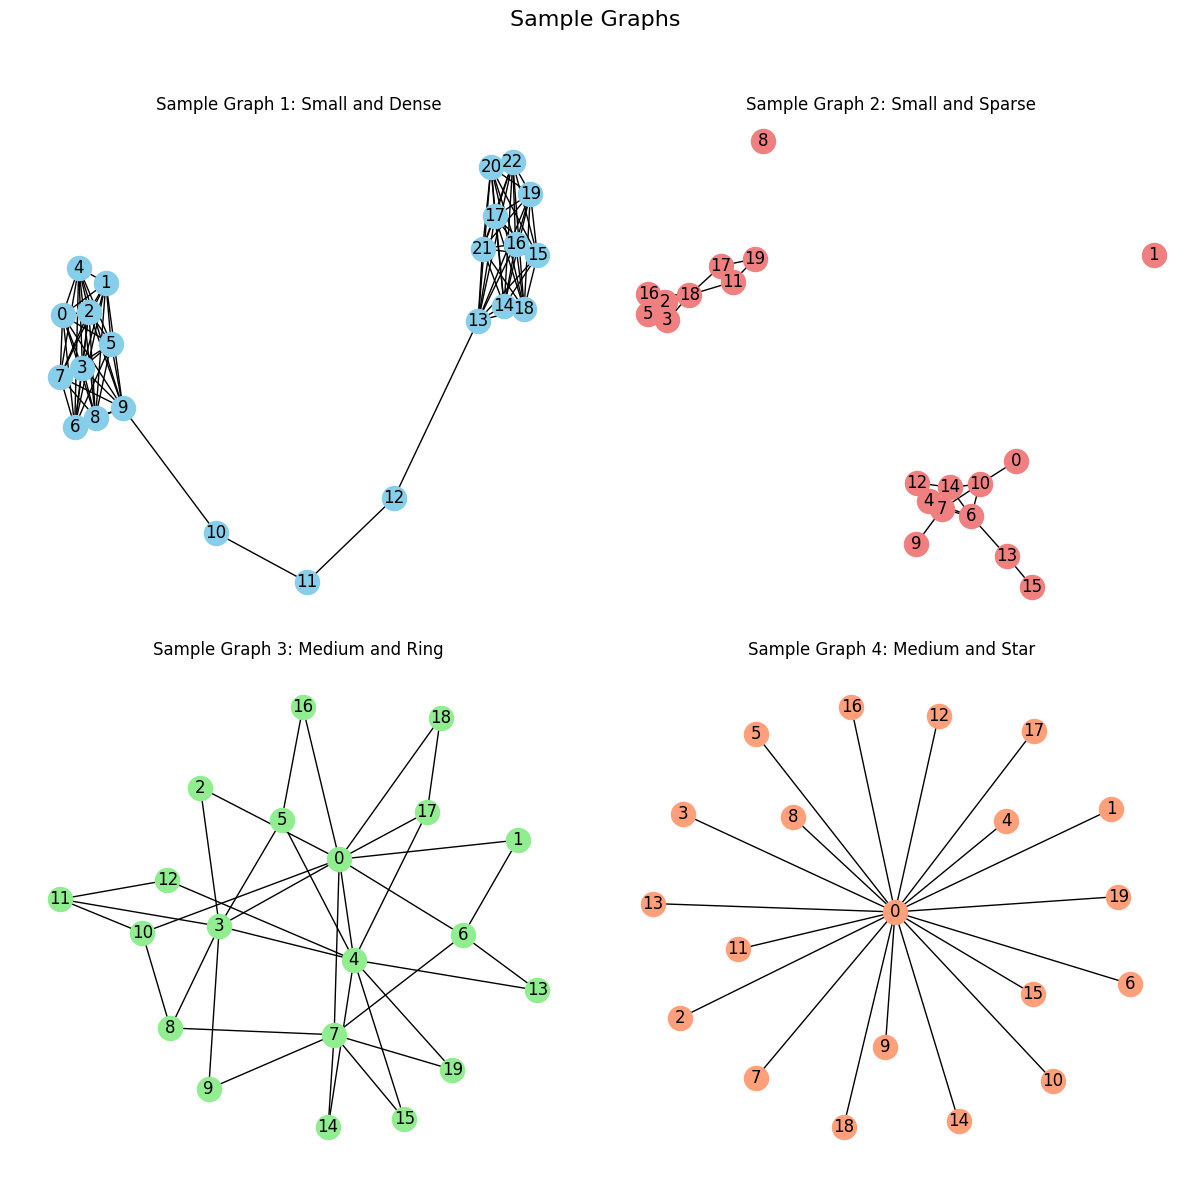

In [ ]:
# Create Sample Graphs
G1 = nx.barbell_graph(10, 3)
G2 = nx.random_geometric_graph(20, 0.2)
G3 = nx.barabasi_albert_graph(20, 2)
G4 = nx.star_graph(19)

sample_graphs = [G1, G2, G3, G4]

# Set up subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot and label each graph
pos1 = nx.spring_layout(G1, seed=42)
nx.draw(G1, pos1, with_labels=True, node_color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title("Sample Graph 1: Small and Dense")

pos2 = nx.spring_layout(G2, seed=42)
nx.draw(G2, pos2, with_labels=True, node_color='lightcoral', ax=axes[0, 1])
axes[0, 1].set_title("Sample Graph 2: Small and Sparse")

pos3 = nx.spring_layout(G3, seed=42)
nx.draw(G3, pos3, with_labels=True, node_color='lightgreen', ax=axes[1, 0])
axes[1, 0].set_title("Sample Graph 3: Medium and Ring")

pos4 = nx.spring_layout(G4, seed=42)
nx.draw(G4, pos4, with_labels=True, node_color='lightsalmon', ax=axes[1, 1])
axes[1, 1].set_title("Sample Graph 4: Medium and Star")

# Visualize graphs
plt.suptitle("Sample Graphs", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## **Degree Centrality**

### **Definition**
Degree Centrality is one of the simplest centrality measures and it quantifies the importance of a node based on the number of edges connected to it. In simple terms, it measures how many direct connections a node has.

### **Calculation**
Degree Centrality of a node is calculated by dividing the number of edges connected to that node by the total number of nodes (or n-1 in the case of directed graphs). Mathematically, for an undirected graph:

$$
Degree\;Centrality(v) = \frac{Number\;of\;Edges\;Connected\;to\;Node\;v}{Total\;Number\;of\;Nodes - 1}
$$

### **Relevance**
*   Degree Centrality identifies nodes with the most direct connections, which can be relevant in social networks where it indicates popular individuals or in infrastructure networks where it indicates highly connected components.
*   Advantages include simplicity and ease of calculation.
*   Disadvantages include not considering the quality of connections, ignoring indirect influence, and making it difficult to uniquely rank nodes depending on the graph.



In [ ]:
# Calculation of the Degree Centrality for each sample graph

for i, G in enumerate(sample_graphs):
  degree_centrality = nx.degree_centrality(G)
  print("Degree Centrality for Sample Graph " + str(i+1) + ":", degree_centrality)

Degree Centrality for Sample Graph 1: {0: 0.4090909090909091, 1: 0.4090909090909091, 2: 0.4090909090909091, 3: 0.4090909090909091, 4: 0.4090909090909091, 5: 0.4090909090909091, 6: 0.4090909090909091, 7: 0.4090909090909091, 8: 0.4090909090909091, 9: 0.4545454545454546, 10: 0.09090909090909091, 11: 0.09090909090909091, 12: 0.09090909090909091, 13: 0.4545454545454546, 14: 0.4090909090909091, 15: 0.4090909090909091, 16: 0.4090909090909091, 17: 0.4090909090909091, 18: 0.4090909090909091, 19: 0.4090909090909091, 20: 0.4090909090909091, 21: 0.4090909090909091, 22: 0.4090909090909091}
Degree Centrality for Sample Graph 2: {0: 0.05263157894736842, 1: 0.0, 2: 0.21052631578947367, 3: 0.21052631578947367, 4: 0.21052631578947367, 5: 0.21052631578947367, 6: 0.2631578947368421, 7: 0.3157894736842105, 8: 0.0, 9: 0.05263157894736842, 10: 0.21052631578947367, 11: 0.15789473684210525, 12: 0.15789473684210525, 13: 0.10526315789473684, 14: 0.2631578947368421, 15: 0.05263157894736842, 16: 0.2105263157894736

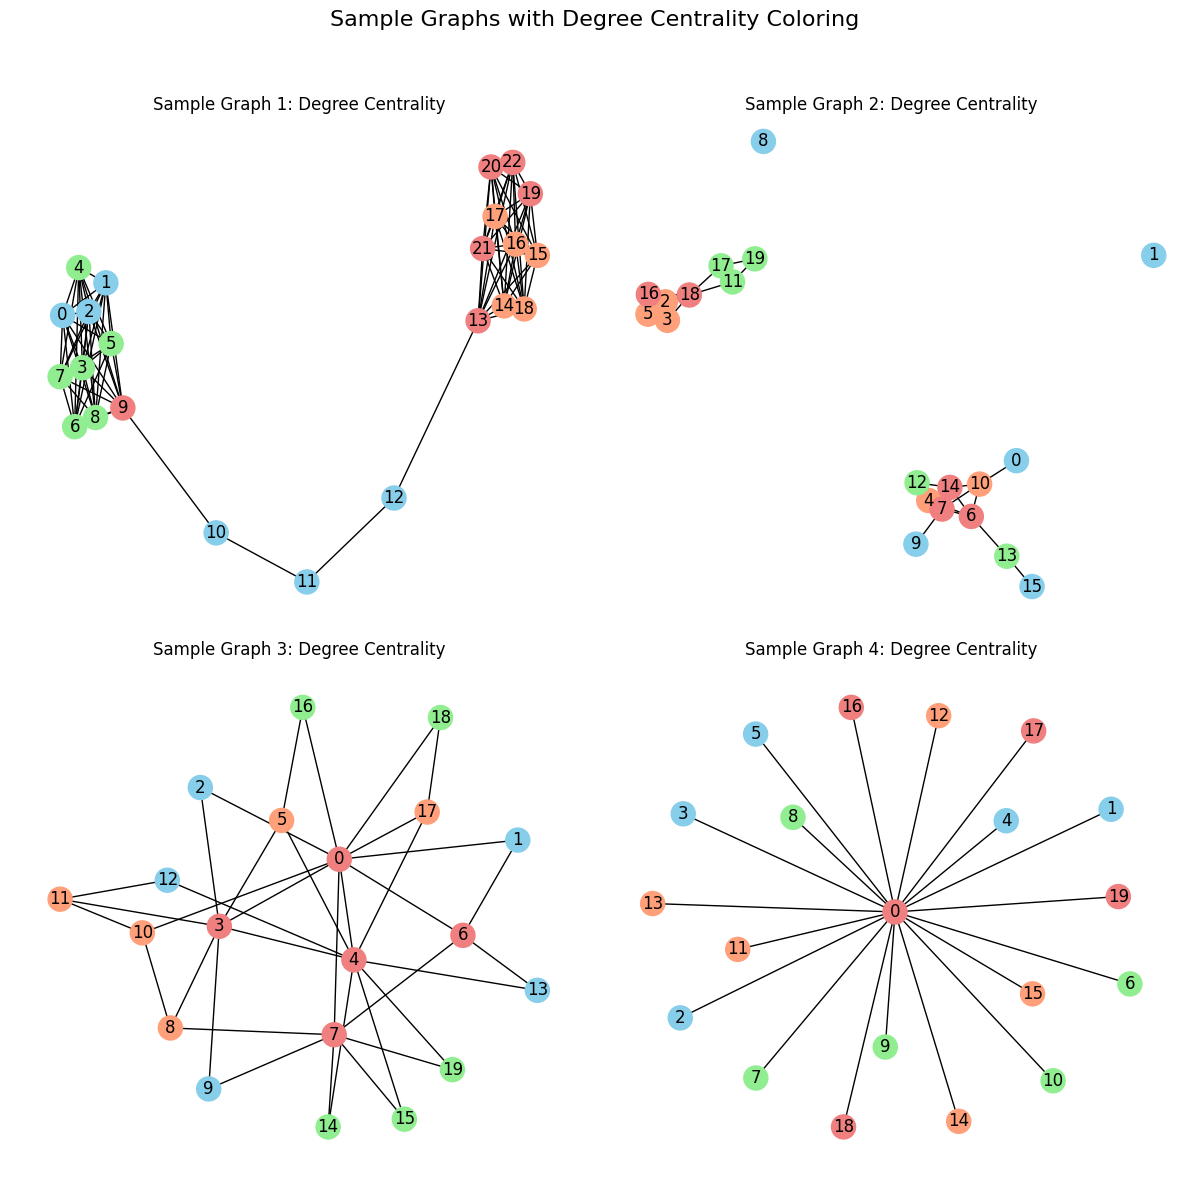

In [ ]:
# Visualization of the Degree Centrality for each sample graph

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, G in enumerate(sample_graphs):
    degree_centrality = nx.degree_centrality(G)
    sorted_nodes = [node for node, centrality in sorted(degree_centrality.items(), key=lambda x: x[1])]

    num_nodes = len(sorted_nodes)
    quartiles = np.percentile(range(num_nodes), [25, 50, 75])

    # Assigning colors based on quartiles of the ranking of degree centrality
    node_colors = []
    for node in G.nodes:
        centrality_rank = sorted_nodes.index(node)
        if centrality_rank <= quartiles[0]:
            node_colors.append('skyblue')
        elif centrality_rank <= quartiles[1]:
            node_colors.append('lightgreen')
        elif centrality_rank <= quartiles[2]:
            node_colors.append('lightsalmon')
        else:
            node_colors.append('lightcoral')

    ax = axes[i // 2, i % 2]
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, ax=ax)
    ax.set_title(f"Sample Graph {i + 1}: Degree Centrality")

plt.suptitle("Sample Graphs with Degree Centrality Coloring", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In the example above, the coloring of each node was assigned according to its corresponding ranking in the degree centrality measure. The nodes with highest ranking (best 25%) were colored in red, while the node with lowest ranking (worse 25%) were colored in blue. The rank classification is clearly noted on the graphs 1, 2, and 3. That is not the case for the graph number 4, which has a simpler structure (all nodes except have same score except the central node 0), in a way that the colors do not add too much value for the classification of these graph.

The degree centrality values for Graph 1 are relatively high, with most nodes having a centrality of approximately 0.41. This suggests a fairly interconnected graph where nodes share a substantial number of connections. However, nodes 10, 11, 12, and 13 have significantly lower centrality values, indicating that they have fewer connections compared to other nodes.

Graph 2 has lower degree centrality values across the board, ranging from 0.0 to 0.32. This implies a less connected network, where nodes generally have fewer connections compared to those in Graph 1. Nodes 6, 7, and 18 have relatively higher centrality values, indicating they are more central in this network.

In Graph 3, the degree centrality values vary widely, with node 0 having the highest centrality of 0.53. This suggests that node 0 is a crucial hub in the network, having more connections than other nodes. Nodes 4, 7, and 18 also have relatively high centrality values, indicating significant connectivity.

Graph 4 exhibits a different pattern, where node 0 has a degree centrality of 1.0, indicating that it is directly connected to every other node in the graph. This suggests a star-like structure, where all nodes are connected to a central hub (node 0). Other nodes have very low centrality values, indicating minimal direct connections.

## **Clustering Coefficient Centrality**

### **Definition**
Clustering Coefficient Centrality is a measure that quantifies how closely a node's neighbors are connected to each other. It assesses the level of clustering or local cohesiveness around a particular node.

### **Calculation**
The Clustering Coefficient for a node is computed by considering the ratio of the number of edges between the neighbors of the node to the maximum possible number of edges between those neighbors. It can also be defined as follows:

$$
Clustering\;Coefficient(v) = \frac{2 * Number\;of\;triangles\;connected\;to\;node\;v}{degree\;of\;node\;v * (degree\;of\;node\;v - 1)}
$$
Here, "number of triangles connected to node v" refers to the number of complete subgraphs (triangles) that include node v.

### **Relevance**
*   Clustering Coefficient Centrality is particularly valuable in assessing how well a node bridges connections within local communities in the network.
*   High clustering coefficients (maximum value = 1) suggest nodes that play a role in creating densely connected clusters, making them vital for maintaining local network cohesion.
*   Advantages include its focus on local structure and its ability to identify nodes that promote community formation.
*   Disadvantages include its limited scope when it comes to assessing global network influence and its sensitivity to network size.



In [ ]:
# Calculation of the Clustering Coefficient Centrality for each sample graph

for i, G in enumerate(sample_graphs):
  clustering_centrality = nx.clustering(G)
  print("Clustering Coefficient Centrality for Sample Graph " + str(i+1) + ":", clustering_centrality)

Clustering Coefficient Centrality for Sample Graph 1: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 0.8, 10: 0, 11: 0, 12: 0, 13: 0.8, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0}
Clustering Coefficient Centrality for Sample Graph 2: {0: 0, 1: 0, 2: 1.0, 3: 1.0, 4: 0.8333333333333334, 5: 1.0, 6: 0.5, 7: 0.4666666666666667, 8: 0, 9: 0, 10: 0.5, 11: 0.6666666666666666, 12: 1.0, 13: 0, 14: 0.7, 15: 0, 16: 1.0, 17: 0.6666666666666666, 18: 0.4666666666666667, 19: 1.0}
Clustering Coefficient Centrality for Sample Graph 3: {0: 0.13333333333333333, 1: 1.0, 2: 1.0, 3: 0.14285714285714285, 4: 0.08333333333333333, 5: 0.3333333333333333, 6: 0.3333333333333333, 7: 0.047619047619047616, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0.6666666666666666, 18: 1.0, 19: 0}
Clustering Coefficient Centrality for Sample Graph 4: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 1

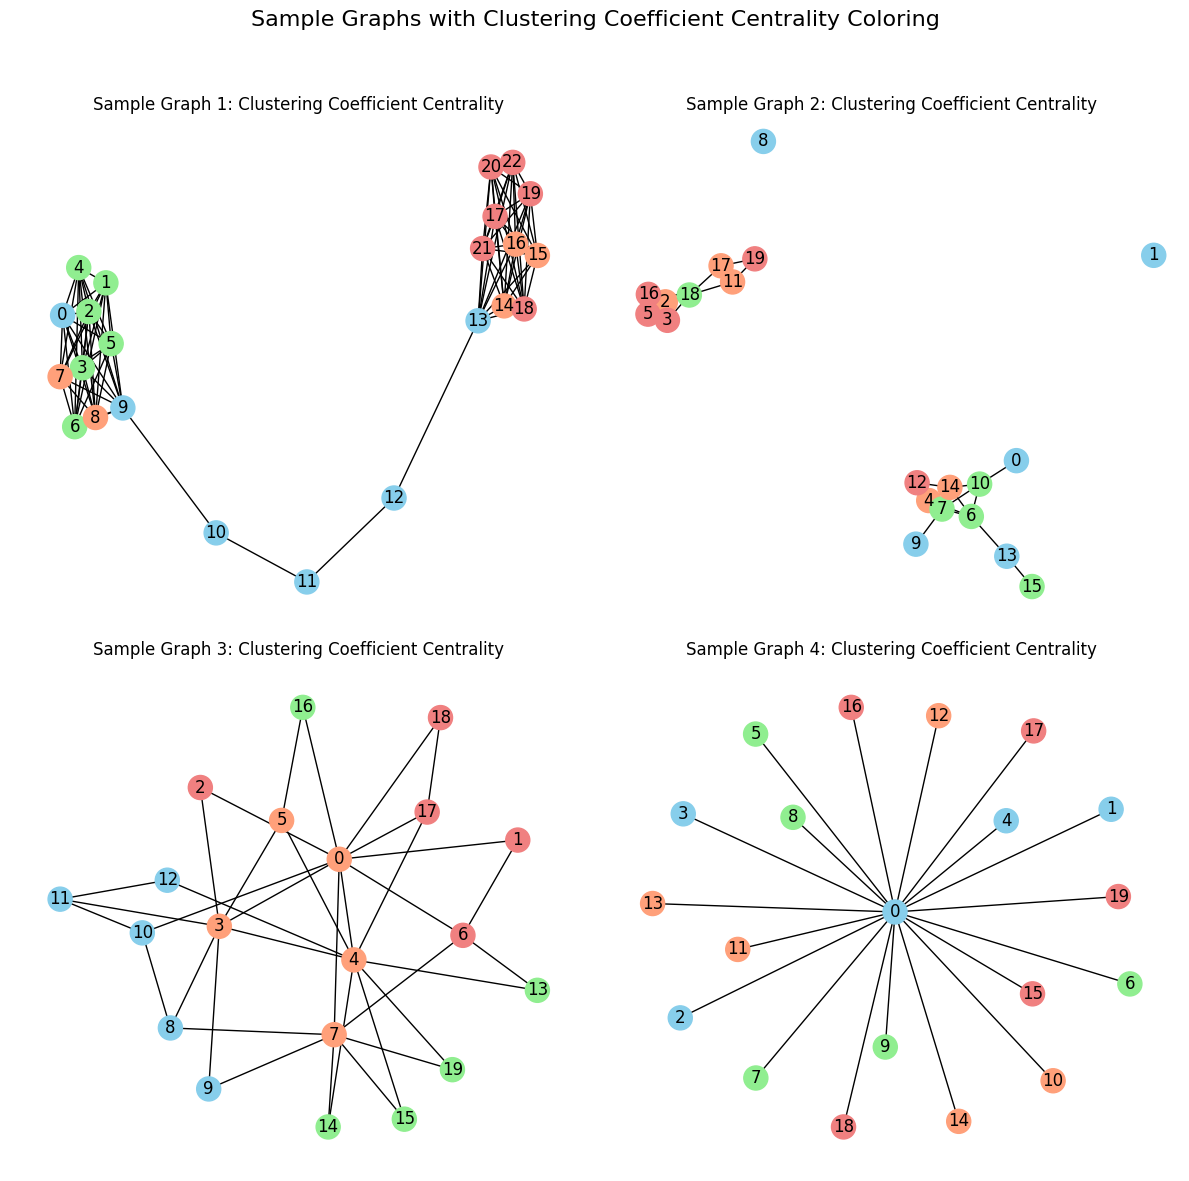

In [ ]:
# Visualization of the Clustering Coefficient Centrality for each sample graph

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, G in enumerate(sample_graphs):
    clustering_centrality = nx.clustering(G)
    sorted_nodes = [node for node, centrality in sorted(clustering_centrality.items(), key=lambda x: x[1])]

    num_nodes = len(sorted_nodes)
    quartiles = np.percentile(range(num_nodes), [25, 50, 75])

    # Assigning colors based on quartiles of the ranking of clustering coefficient centrality
    node_colors = []
    for node in G.nodes:
        centrality_rank = sorted_nodes.index(node)
        if centrality_rank <= quartiles[0]:
            node_colors.append('skyblue')
        elif centrality_rank <= quartiles[1]:
            node_colors.append('lightgreen')
        elif centrality_rank <= quartiles[2]:
            node_colors.append('lightsalmon')
        else:
            node_colors.append('lightcoral')

    ax = axes[i // 2, i % 2]
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, ax=ax)
    ax.set_title(f"Sample Graph {i + 1}: Clustering Coefficient Centrality")

plt.suptitle("Sample Graphs with Clustering Coefficient Centrality Coloring", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Again, in the example above, graphs 2, 3, and 4 do not have a good color representation for this centrality measure since there are no triangles in any of these graphs, in a way that all nodes of such graph have score 0.

In this case, graphs 2 and 4 do not have a good color representation for this centrality measure since there are almost no triangles in any of these graphs, in a way that the majority of nodes of such graphs have score 0. However, graphs 1 and 3 generated an interesting result. There is a clear difference between nodes who have more neighbours connected to each other (proportionally to its number of neighbours) and nodes who do not.

In Graph 1, every node has a clustering coefficient centrality of 1.0, indicating that each node forms a complete subgraph with its neighbors. This suggests a highly cohesive and tightly interconnected structure where each node is part of a fully connected local neighborhood.

Graph 2 exhibits a more varied clustering coefficient centrality pattern. Nodes 2, 3, 5, 14, and 16 have a centrality of 1.0, indicating that they form complete subgraphs with their neighbors. Other nodes have lower centrality values, suggesting less cohesion in their local neighborhoods. Nodes 6, 10, and 18 have intermediate values, indicating moderate local clustering.

The clustering coefficient centrality values for Graph 3 vary widely. Nodes 1, 2, and 18 have a clustering coefficient centrality of 1.0, forming complete subgraphs with their neighbors. On the other hand, nodes 0, 3, 4, and 17 have much lower values, suggesting a less cohesive local structure.

Graph 4 stands out with all nodes having a clustering coefficient centrality of 0, indicating an absence of local clustering. This suggests that in this graph, nodes do not form local clusters with their neighbors, and the overall structure lacks local connectivity.

## **Closeness Centrality**

### **Definition**
Closeness Centrality is a measure that quantifies how quickly information can spread from a given node to all other nodes in a network. It focuses on the proximity of a node to all other nodes, assessing how easily and directly it can communicate or interact with the rest of the network.

### **Calculation**
The Closeness Centrality of a node is calculated by determining the average shortest path length from that node to all other nodes in the graph. Mathematically, for an undirected graph:

$$
Closeness\;Centrality(v) = \frac{1}{\sum_{u ≠ v} dist(u, v)}
$$
Where:

*   v is the node for which closeness centrality is being calculated.
*   dist(u,v) represents the shortest path distance between node u and node v.


### **Relevance**
*   Closeness Centrality identifies nodes that can efficiently transmit information or influence to other nodes in the network.
*   Advantages include its focus on information flow, identifying nodes that act as fast connectors in the network, and capturing global network influence.
*   Disadvantages include sensitivity to disconnected components in the graph and potential scalability issues in large networks.



In [ ]:
# Calculation of the Closeness Centrality for each sample graph

for i, G in enumerate(sample_graphs):
  closeness_centrality = nx.closeness_centrality(G)
  print("Closeness Centrality for Sample Graph " + str(i+1) + ":", closeness_centrality)

Closeness Centrality for Sample Graph 1: {0: 0.2857142857142857, 1: 0.2857142857142857, 2: 0.2857142857142857, 3: 0.2857142857142857, 4: 0.2857142857142857, 5: 0.2857142857142857, 6: 0.2857142857142857, 7: 0.2857142857142857, 8: 0.2857142857142857, 9: 0.34375, 10: 0.36065573770491804, 11: 0.36666666666666664, 12: 0.36065573770491804, 13: 0.34375, 14: 0.2857142857142857, 15: 0.2857142857142857, 16: 0.2857142857142857, 17: 0.2857142857142857, 18: 0.2857142857142857, 19: 0.2857142857142857, 20: 0.2857142857142857, 21: 0.2857142857142857, 22: 0.2857142857142857}
Closeness Centrality for Sample Graph 2: {0: 0.18535469107551486, 1: 0.0, 2: 0.2344497607655502, 3: 0.2344497607655502, 4: 0.2664473684210526, 5: 0.2344497607655502, 6: 0.32793522267206476, 7: 0.32793522267206476, 8: 0.0, 9: 0.20300751879699247, 10: 0.28421052631578947, 11: 0.2344497607655502, 12: 0.22437673130193903, 13: 0.22437673130193903, 14: 0.30451127819548873, 15: 0.15789473684210525, 16: 0.2344497607655502, 17: 0.2344497607

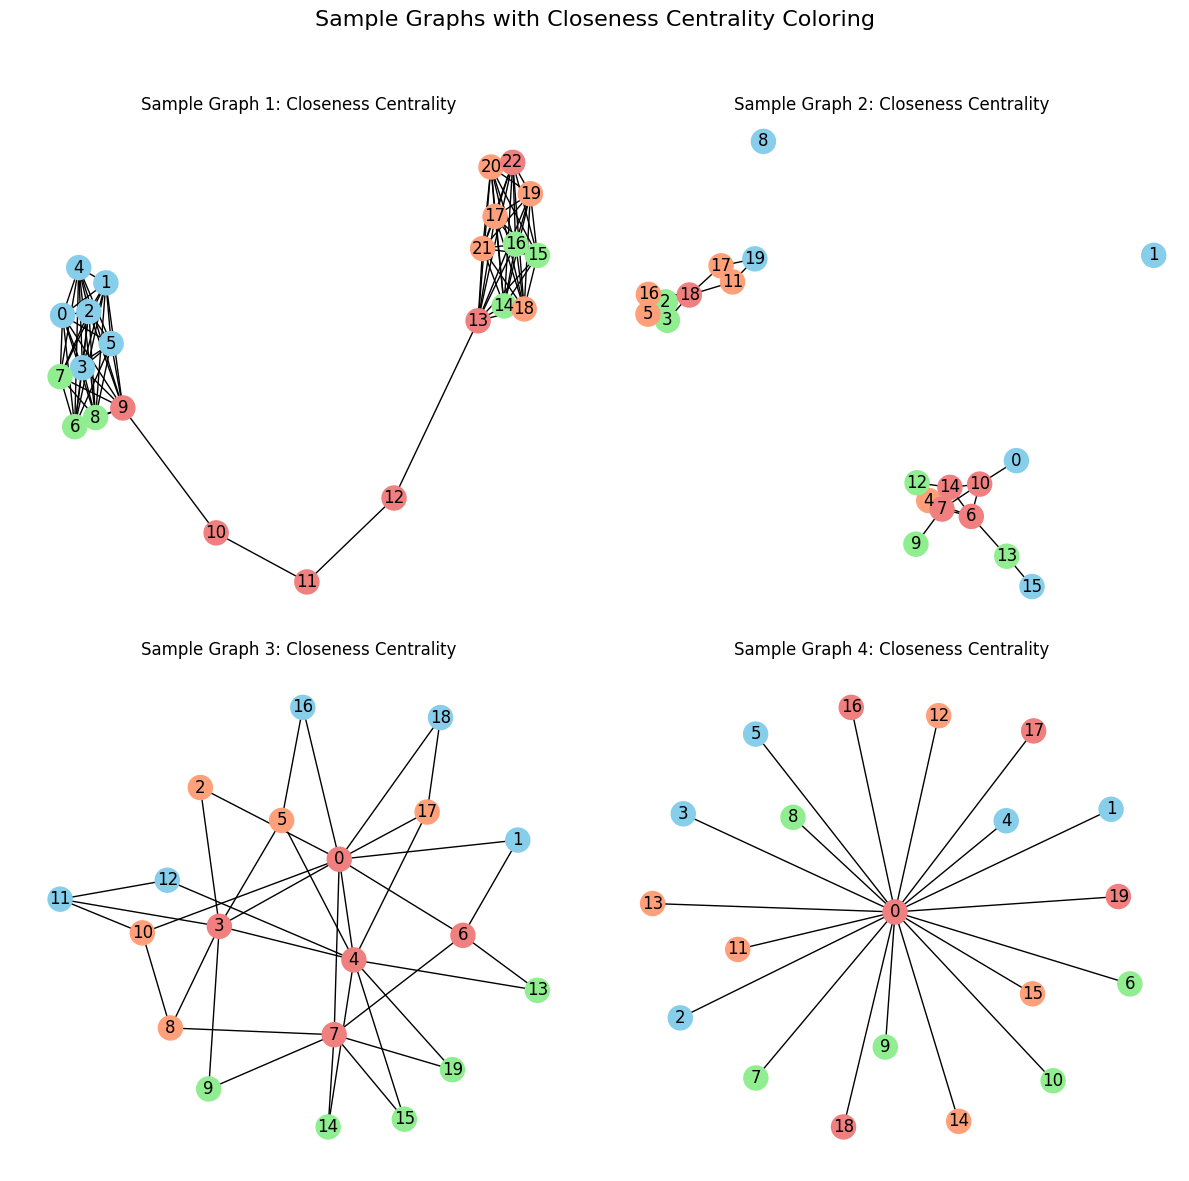

In [ ]:
# Visualization of the Closeness Centrality for each sample graph

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, G in enumerate(sample_graphs):
    closeness_centrality = nx.closeness_centrality(G)
    sorted_nodes = [node for node, centrality in sorted(closeness_centrality.items(), key=lambda x: x[1])]

    num_nodes = len(sorted_nodes)
    quartiles = np.percentile(range(num_nodes), [25, 50, 75])

    # Assigning colors based on quartiles of the ranking of closeness centrality
    node_colors = []
    for node in G.nodes:
        centrality_rank = sorted_nodes.index(node)
        if centrality_rank <= quartiles[0]:
            node_colors.append('skyblue')
        elif centrality_rank <= quartiles[1]:
            node_colors.append('lightgreen')
        elif centrality_rank <= quartiles[2]:
            node_colors.append('lightsalmon')
        else:
            node_colors.append('lightcoral')

    ax = axes[i // 2, i % 2]
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, ax=ax)
    ax.set_title(f"Sample Graph {i + 1}: Closeness Centrality")

plt.suptitle("Sample Graphs with Closeness Centrality Coloring", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

For this centrality measure, the result is clear for graphs 1, 2, and 3. Nodes marked in red have play a more central role in the disposition of the graph strucure, connecting faster to the other nodes of the graph, while nodes marked in blue are more isolated from the rest of the nodes. As for graph 4, the central node has maximum score, while all the other nodes have all same score, in such way that the color representation is not too effective.

In Graph 1, the closeness centrality values are relatively uniform across nodes, ranging from approximately 0.29 to 0.36. This suggests that information can be transmitted efficiently throughout the network, with each node having a relatively short average distance to other nodes.

Graph 2 exhibits more variability in closeness centrality values. While some nodes have relatively high centrality, indicating efficient information flow (e.g., nodes 6, 7, and 14), others have lower centrality values, suggesting longer average distances to reach other nodes. Node 1 has a closeness centrality of 0, indicating that it is not reachable from other nodes.

In Graph 3, the closeness centrality values vary widely. Nodes 0, 4, and 16 have high centrality values, indicating that they can efficiently spread information throughout the network. On the other hand, nodes 1, 8, and 11 have lower centrality values, suggesting longer average distances to reach other nodes.

Graph 4 has a unique pattern where all nodes, except for node 0, have a closeness centrality of 0.51. Node 0 has a centrality of 1.0, indicating that it is directly connected to all other nodes and can efficiently transmit information to any part of the network.

## **Betweenness Centrality**

### **Definition**
Betweenness Centrality is a measure that identifies the nodes in a network that act as key bridges or intermediaries between other nodes. It quantifies the extent to which a node lies on the shortest paths between other pairs of nodes in the network. Nodes with high betweenness centrality have a significant influence on the flow of information or resources within the network.

### **Calculation**
The Betweenness Centrality for a node v is computed by determining the number of shortest paths that pass through that node, divided by the total number of shortest paths between all pairs of nodes. Mathematically:

$$
Betweeness\;Centrality(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}
$$
Where:

*   σ_st is the total number of shortest paths from node s to node t.
*   σ_st(v) is the number of those paths that pass through node v.


### **Relevance**
*   Betweenness Centrality identifies nodes that play a crucial role in facilitating communication, resource transfer, or information flow between different parts of the network. It is valuable for detecting bottleneck nodes that, if removed, can significantly disrupt network connectivity.
*   Advantages include its focus on nodes that promote network integration and its ability to pinpoint influential intermediaries.
*   Disadvantages include potential scalability issues in large networks due to the need to compute shortest paths for all pairs of nodes and the assumption that shortest paths are the most critical.



In [ ]:
# Calculation of the Betweeness Centrality for each sample graph

for i, G in enumerate(sample_graphs):
  betweenness_centrality = nx.betweenness_centrality(G)
  print("Betweeness Centrality for Sample Graph " + str(i+1) + ":", betweenness_centrality)

Betweeness Centrality for Sample Graph 1: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.5064935064935064, 10: 0.5194805194805194, 11: 0.5238095238095238, 12: 0.5194805194805194, 13: 0.5064935064935064, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0}
Betweeness Centrality for Sample Graph 2: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.005847953216374268, 5: 0.0, 6: 0.08576998050682261, 7: 0.06237816764132552, 8: 0.0, 9: 0.0, 10: 0.04678362573099415, 11: 0.014619883040935672, 12: 0.0, 13: 0.04678362573099415, 14: 0.01559454191033138, 15: 0.0, 16: 0.0, 17: 0.014619883040935672, 18: 0.07017543859649122, 19: 0.0}
Betweeness Centrality for Sample Graph 3: {0: 0.37246588693957106, 1: 0.0, 2: 0.0, 3: 0.1740253411306043, 4: 0.30964912280701756, 5: 0.021929824561403504, 6: 0.04142300194931774, 7: 0.15730994152046782, 8: 0.0192495126705653, 9: 0.0038499025341130603, 10: 0.03060428849902534, 11: 0.021832358674463936, 12: 0.0160818713450292

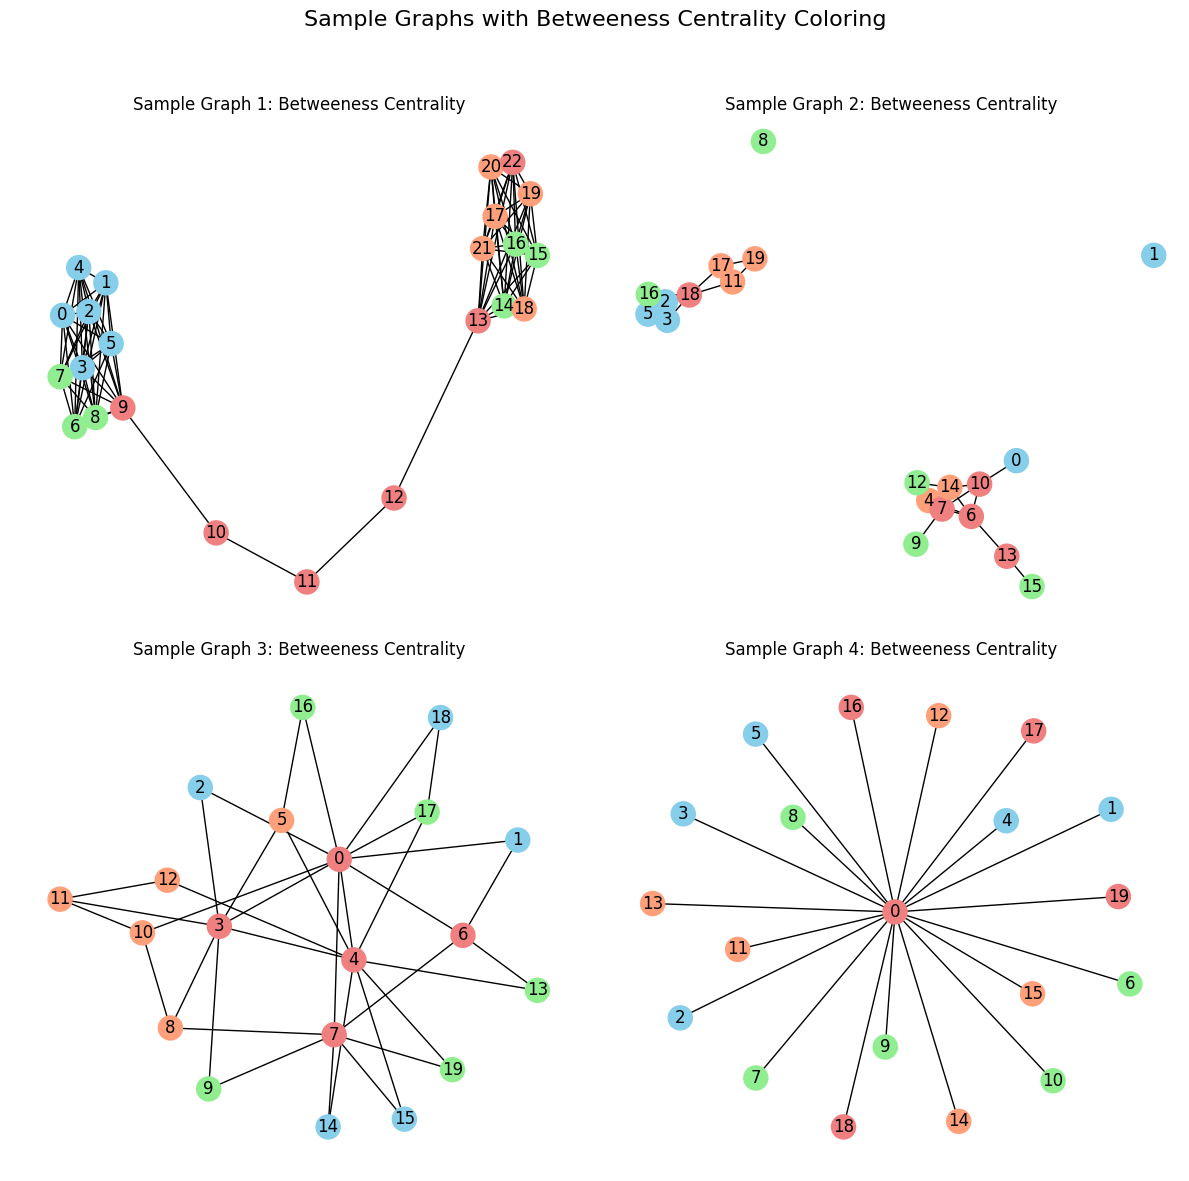

In [ ]:
# Visualization of the Betweeness Centrality for each sample graph

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for i, G in enumerate(sample_graphs):
    betweenness_centrality = nx.betweenness_centrality(G)
    sorted_nodes = [node for node, centrality in sorted(betweenness_centrality.items(), key=lambda x: x[1])]

    num_nodes = len(sorted_nodes)
    quartiles = np.percentile(range(num_nodes), [25, 50, 75])

    # Assigning colors based on quartiles of the ranking of betweeness centrality
    node_colors = []
    for node in G.nodes:
        centrality_rank = sorted_nodes.index(node)
        if centrality_rank <= quartiles[0]:
            node_colors.append('skyblue')
        elif centrality_rank <= quartiles[1]:
            node_colors.append('lightgreen')
        elif centrality_rank <= quartiles[2]:
            node_colors.append('lightsalmon')
        else:
            node_colors.append('lightcoral')

    ax = axes[i // 2, i % 2]
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, ax=ax)
    ax.set_title(f"Sample Graph {i + 1}: Betweeness Centrality")

plt.suptitle("Sample Graphs with Betweeness Centrality Coloring", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

As seen from above, nodes marked in red in the graphs 1, 2, and 3 act as bridges to connect nodes from different communities, while nodes marked in blue are located in the "peripheriess" of the graph. Again, the central node in graph 4 has maximum score, while all the other nodes have all same score (0), in such way that the color representation is not too effective.

In Graph 1, betweenness centrality values are low for all nodes except for nodes 9, 10, 11, 12, 13. These nodes have relatively high betweenness centrality values, indicating that they lie on many shortest paths between other nodes. This suggests that these nodes act as critical connectors in the network, potentially influencing the flow of information between different parts of the graph.

Graph 2 also has low betweenness centrality values for most nodes, with only a few nodes (6, 7, 10, 13, 18) having non-zero values. Nodes 6 and 7 have relatively higher betweenness centrality, suggesting that they play a key role in connecting different parts of the network.

In Graph 3, betweenness centrality values are more distributed across the nodes. Nodes 0 and 4 have the highest betweenness centrality, indicating their importance in connecting different parts of the graph. Nodes 6, 7, 10, and 17 also have non-negligible betweenness centrality values, highlighting their potential influence on the flow of information.

Graph 4 stands out with node 0 having a betweenness centrality of 1.0, indicating that all shortest paths pass through this node. This suggests that node 0 acts as a crucial bridge or bottleneck in the network, controlling the flow of information between other nodes.

## **Centrality Comparison for Each Graph**

###**Graph 1:**
- Degree Centrality: All nodes have similar high degree centrality values, indicating a well-connected network.
- Clustering Coefficient Centrality: All nodes have a clustering coefficient centrality of 1.0, suggesting that each node forms a complete subgraph with its neighbors.
- Closeness Centrality: Closeness centrality values are relatively uniform, indicating efficient information flow.
- Betweenness Centrality: Nodes 9, 10, 11, 12, and 13 have high betweenness centrality, acting as crucial connectors.

###**Graph 2:**
- Degree Centrality: Nodes have varying degree centrality values, indicating a less uniform network.
- Clustering Coefficient Centrality: Nodes 2, 3, 5, 14, and 16 have a clustering coefficient centrality of 1.0, indicating complete subgraphs.
- Closeness Centrality: Closeness centrality values vary, with nodes 6, 7, and 14 having higher efficiency.
- Betweenness Centrality: Nodes 6 and 7 have higher betweenness centrality, acting as connectors.

###**Graph 3:**
- Degree Centrality: Nodes have varying degree centrality values, indicating a more diverse connectivity pattern.
- Clustering Coefficient Centrality: Nodes 0, 4, 16 have high clustering coefficient centrality, forming complete subgraphs.
- Closeness Centrality: Closeness centrality values vary, with nodes 0, 4, and 16 being more central.
- Betweenness Centrality: Nodes 0 and 4 have high betweenness centrality, acting as important connectors.


###**Graph 4:**
- Degree Centrality: Node 0 has the highest degree centrality, indicating a star-like structure.
- Clustering Coefficient Centrality: All nodes have a clustering coefficient centrality of 0, suggesting an absence of local clustering.
- Closeness Centrality: Node 0 has the highest closeness centrality, indicating efficient information flow through this central node.
- Betweenness Centrality: Node 0 has a betweenness centrality of 1.0, acting as the sole connector in the network.